In [1]:
library('rjson')

In [2]:
json_file = "http://crix.hu-berlin.de/data/crix.json"
json_data = fromJSON(file=json_file)
crix_data_frame=as.data.frame(json_data)

In [3]:
x=crix_data_frame
dim(x)

[1]    1 2358

In [4]:
n=dim(x)
a=seq(1,n[2],2)
b=seq(2,n[2],2)

In [5]:
date=t(x[1,a])
price=t(x[1,b])

In [6]:
crix=data.frame(date,price)

In [7]:
load("ecrix.RData")
load("efcrix.RData")

## Figure3: Daily value of indices in the CRIX family

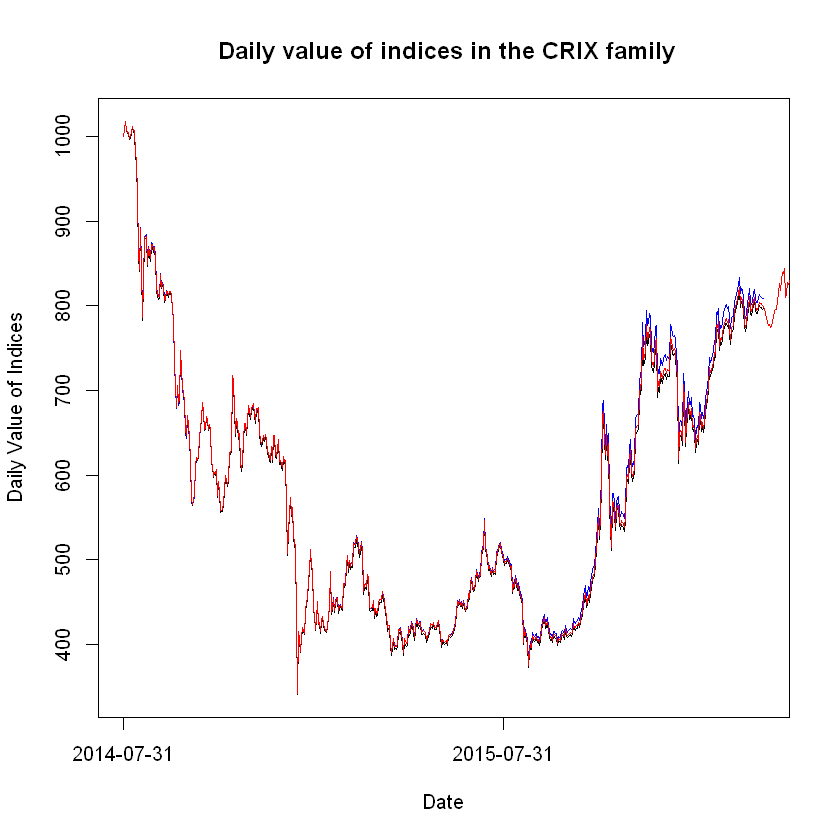

In [8]:
plot(ecrix, type = "l", col = "blue", xaxt = "n",main = " Daily value of indices in the CRIX family",xlab = "Date", ylab = "Daily Value of Indices")
lines(efcrix, col = "black")
lines(price, col = "red")
lab=seq(1,n[2],365)
axis(1, at = lab, label = names(ecrix)[lab])

## Figure 4: The log returns of CRIX index 

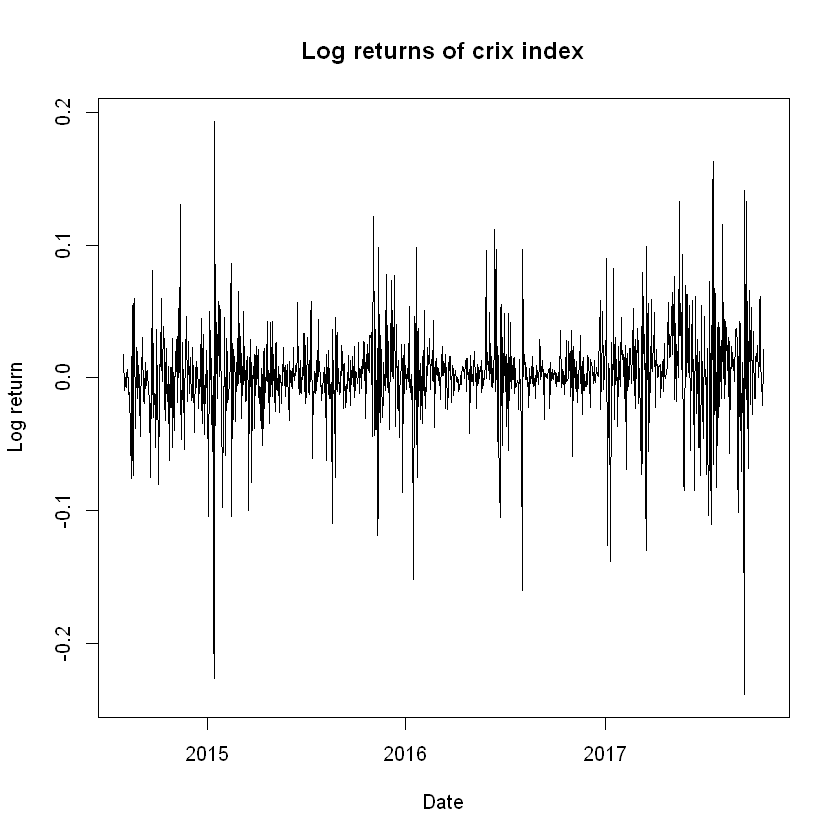

In [9]:
ret=diff(log(price))
plot(ret~as.Date(date[-1]), type="l", col="black", xlab="Date", ylab="Log return", main="Log returns of crix index")

## Figure 5: Histogram and QQ plot of CRIX returns 

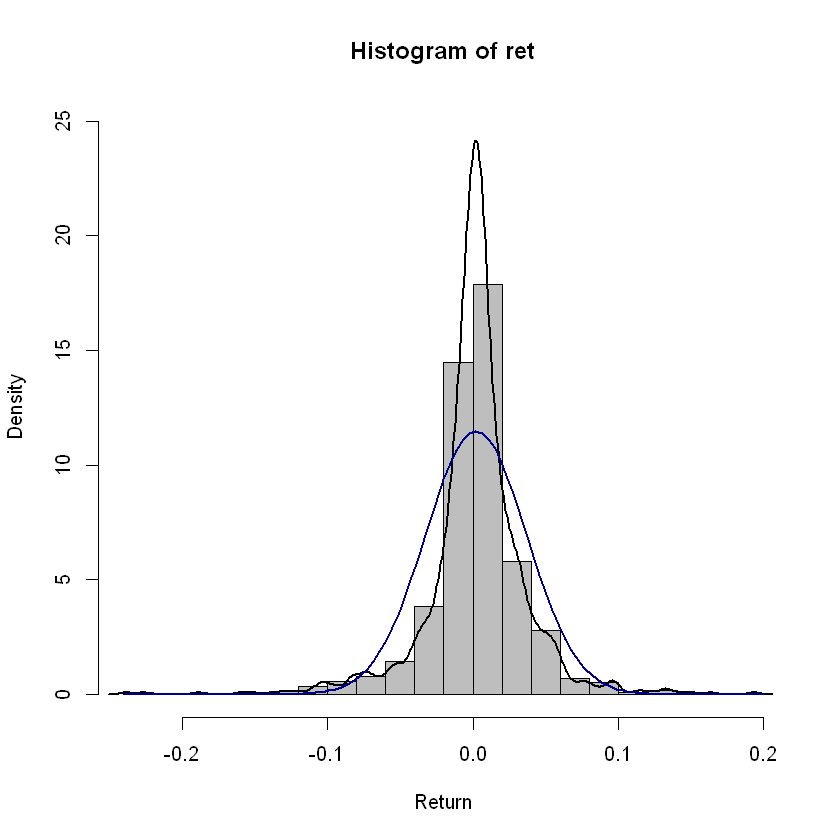

In [10]:
hist(ret, col = "grey", breaks = 20, freq = FALSE, ylim = c(0, 25), xlab = "Return")
lines(density(ret), lwd = 2)
x = seq(-4, 4, length = 100)
curve(dnorm(x, mean = mean(ret), sd = sd(ret)), add=TRUE, col = "darkblue", lwd = 2)

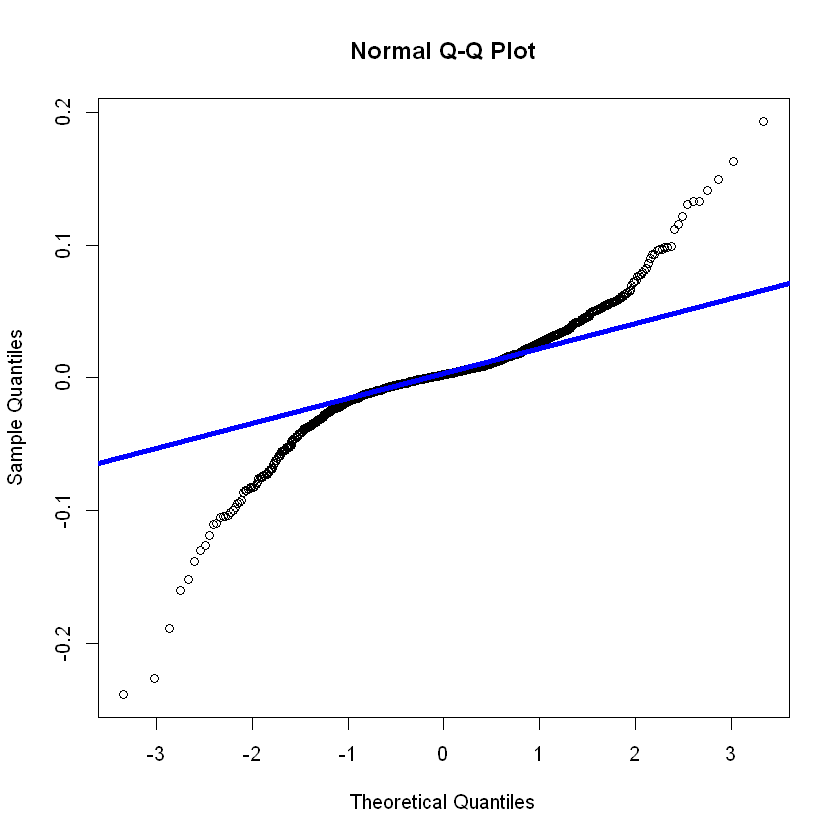

In [11]:
qqnorm(ret)
qqline(ret, col = "blue", lwd = 4)

## Figure 6: The sample ACF and PACF of CRIX returns

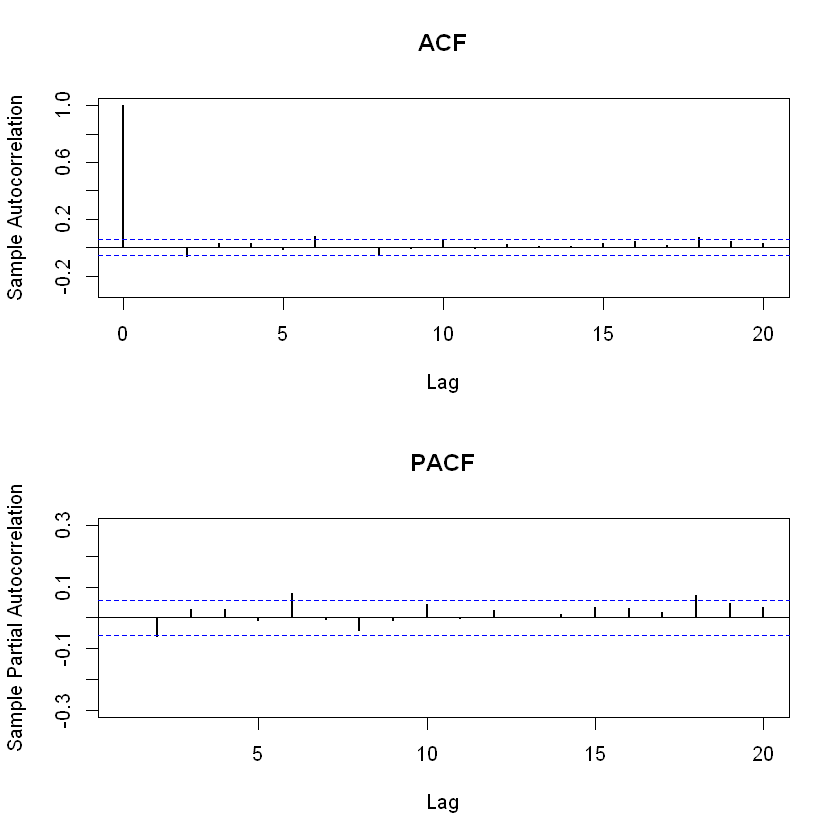

In [13]:
par(mfrow = c(2, 1))
libraries = c("zoo", "tseries")
autocorr = acf(ret, lag.max = 20, ylab = "Sample Autocorrelation", 
               main = "ACF" , 
               lwd = 2, ylim = c(-0.3, 1))
autopcorr = pacf(ret, lag.max = 20, ylab = "Sample Partial Autocorrelation",
                 main = "PACF" , 
                 ylim = c(-0.3, 0.3), lwd = 2)

## Figure 7:Diagnostic Checking

In [15]:
library(TTR)
library(TSA)
library(caschrono)
library(forecast)

In [16]:
auto.arima(ret)

Series: ret 
ARIMA(1,1,0) with drift 

Coefficients:
          ar1  drift
      -0.4695  0e+00
s.e.   0.0257  9e-04

sigma^2 estimated as 0.001881:  log likelihood=2022.35
AIC=-4038.7   AICc=-4038.68   BIC=-4023.49

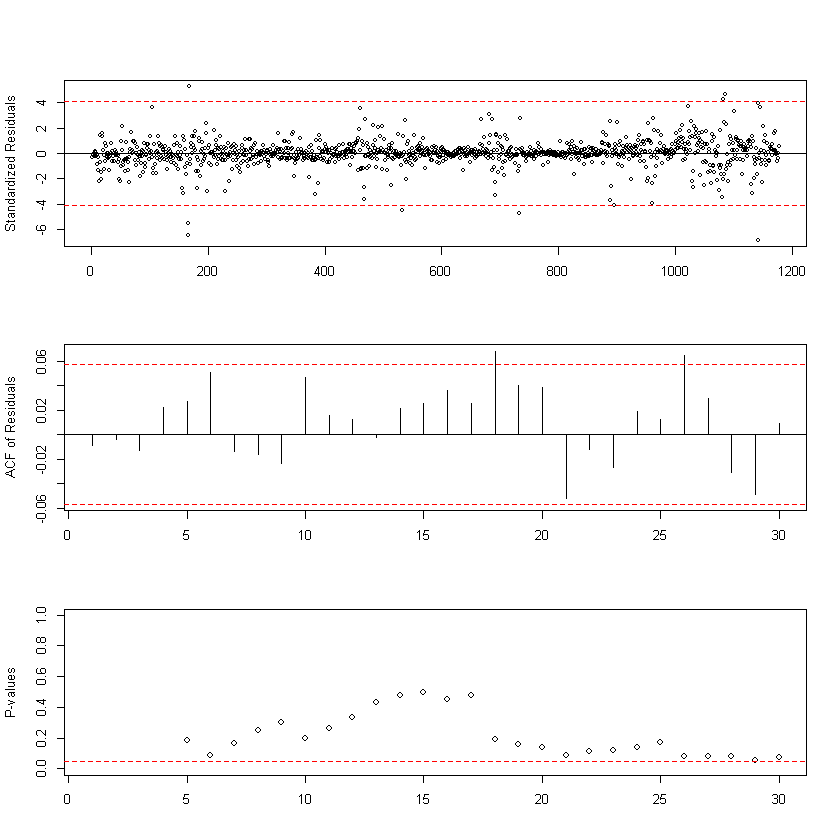

In [17]:
fit = arima(ret, order = c(2, 0, 2))
tsdiag(fit)

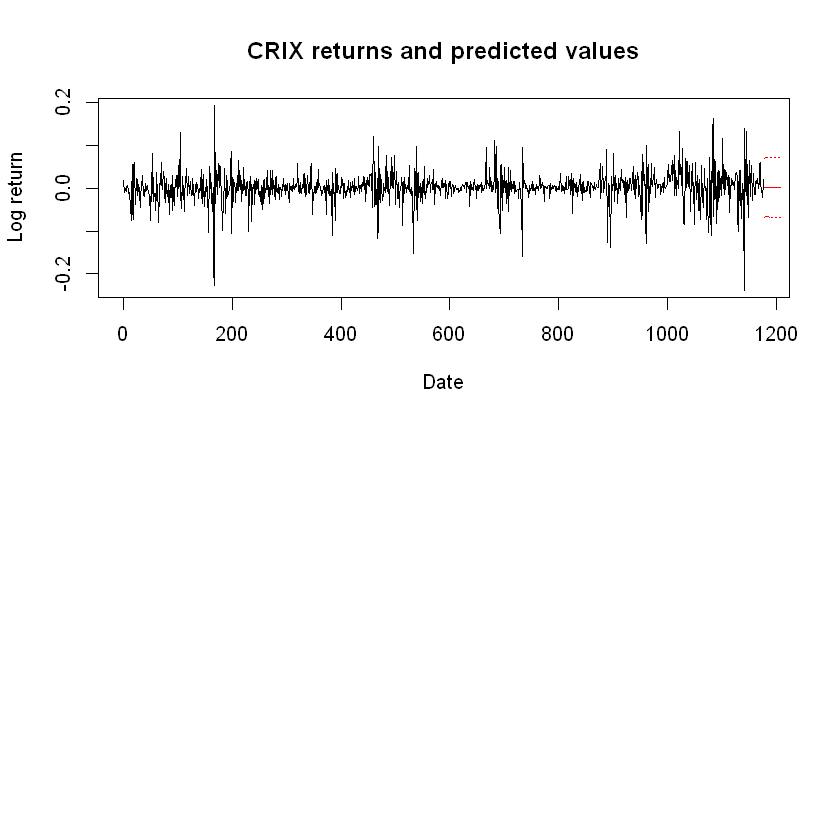

In [18]:
par(mfrow = c(2, 1))
crix_pre = predict(fit, n.ahead = 30)
#dates = seq(as.Date("31/07/2014", format = "%d/%m/%Y"), by = "days", length = length(ret))
plot(ret, type = "l", ylab = "Log return", xlab = "Date", 
     lwd = 1, main = "CRIX returns and predicted values")
lines(crix_pre$pred, col = "red", lwd = 1)
lines(crix_pre$pred + 2 * crix_pre$se, col = "red", lty = 3, lwd = 1)
lines(crix_pre$pred - 2 * crix_pre$se, col = "red", lty = 3, lwd = 1)